In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

import lightgbm as lgb

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [2]:
import os
file_path = os.path.join('..', 'data', 'raw', 'sales_train.xlsx')
train = pd.read_excel(file_path)

# Первый взгляд на данные

In [3]:
train

,date,Month,Year,date_block_num,week,shop_id,item_id,brand_id,item_cnt_day,item_price,discamount,promo,size_disc,promo_time,spec_promo
0,2018-01-01,1,2018,0,1,111,35852544067,10013,1,265,0,0,0,0,0
1,2018-01-01,1,2018,0,1,111,15793344028,10021,1,228,0,0,0,0,0
2,2018-01-01,1,2018,0,1,111,8221024002,10021,1,425,0,0,0,0,0
3,2018-01-01,1,2018,0,1,111,20221376004,10013,1,139,0,0,0,0,0
4,2018-01-01,1,2018,0,1,111,20221040001,10013,1,135,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99809,2020-03-31,3,2020,26,120,111,15818768006,10021,0,230,115,1,50,6,0
99810,2020-03-31,3,2020,26,120,111,16923312074,10021,0,580,290,1,50,6,0
99811,2020-03-31,3,2020,26,120,111,16923312064,10021,0,325,163,1,50,6,0
99812,2020-03-31,3,2020,26,120,111,16925552013,10021,0,210,105,1,50,6,0


In [4]:
train.describe()

,date,Month,Year,date_block_num,week,shop_id,item_id,brand_id,item_cnt_day,item_price,discamount,promo,size_disc,promo_time,spec_promo
count,99814,99814.000000,99814.000000,99814.000000,99814.000000,99814.000000,9.981400e+04,99814.000000,99814.000000,99814.000000,99814.000000,99814.000000,99814.000000,99814.000000,99814.000000
mean,2019-03-17 23:30:28.096259072,6.308584,2018.726251,14.023594,64.233334,115.671749,1.877684e+10,10017.740016,1.054712,404.842808,88.029315,0.439217,19.864698,4.801320,0.068858
min,2018-01-01 00:00:00,1.000000,2018.000000,0.000000,1.000000,110.000000,7.851312e+09,10013.000000,-4.000000,0.000000,-723.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-09-23 00:00:00,3.000000,2018.000000,8.000000,38.000000,110.000000,1.582874e+10,10013.000000,1.000000,253.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-03-16 00:00:00,6.000000,2019.000000,14.000000,64.000000,111.000000,1.692421e+10,10021.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019-10-06 00:00:00,10.000000,2019.000000,21.000000,93.000000,128.000000,1.702434e+10,10021.000000,1.000000,491.000000,150.000000,1.000000,45.000000,3.000000,0.000000
max,2020-03-31 00:00:00,12.000000,2020.000000,26.000000,120.000000,128.000000,9.003758e+10,10021.000000,22.000000,3681.000000,1841.000000,1.000000,50.000000,29.000000,1.000000
std,NaN,3.694841,0.665695,7.482713,33.141317,7.951575,8.779890e+09,3.930971,0.534787,257.717373,131.061558,0.496294,22.746946,9.062332,0.253214


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99814 entries, 0 to 99813
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            99814 non-null  datetime64[ns]
 1   Month           99814 non-null  int64         
 2   Year            99814 non-null  int64         
 3   date_block_num  99814 non-null  int64         
 4   week            99814 non-null  int64         
 5   shop_id         99814 non-null  int64         
 6   item_id         99814 non-null  int64         
 7   brand_id        99814 non-null  int64         
 8   item_cnt_day    99814 non-null  int64         
 9   item_price      99814 non-null  int64         
 10  discamount      99814 non-null  int64         
 11  promo           99814 non-null  int64         
 12  size_disc       99814 non-null  int64         
 13  promo_time      99814 non-null  int64         
 14  spec_promo      99814 non-null  int64         
dtypes:

In [6]:
train.isnull().sum() * 100 / len(train)

date              0.0
Month             0.0
Year              0.0
date_block_num    0.0
week              0.0
shop_id           0.0
item_id           0.0
brand_id          0.0
item_cnt_day      0.0
item_price        0.0
discamount        0.0
promo             0.0
size_disc         0.0
promo_time        0.0
spec_promo        0.0
dtype: float64

In [7]:
sales_by_date = train.groupby('date')['item_cnt_day'].sum()
sales_by_brand = train.groupby('brand_id')['item_cnt_day'].sum()
promo_sales = train[train['promo'] == 1].groupby('date')['item_cnt_day'].sum()

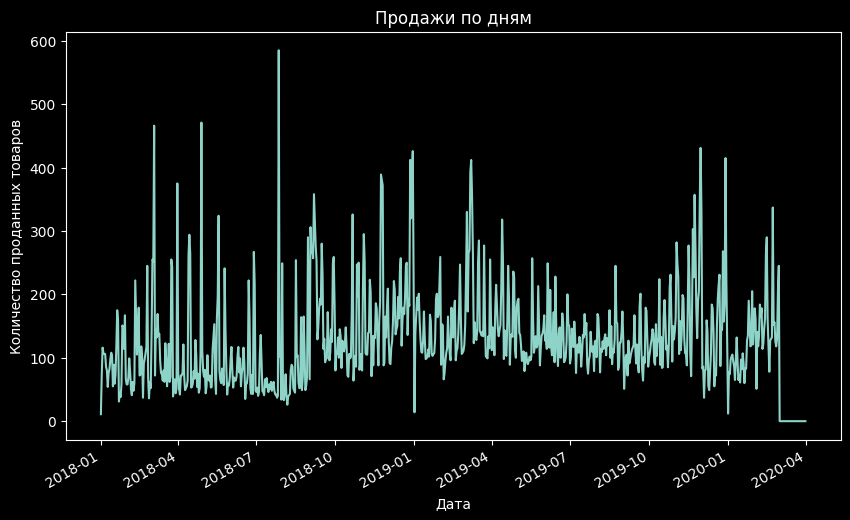

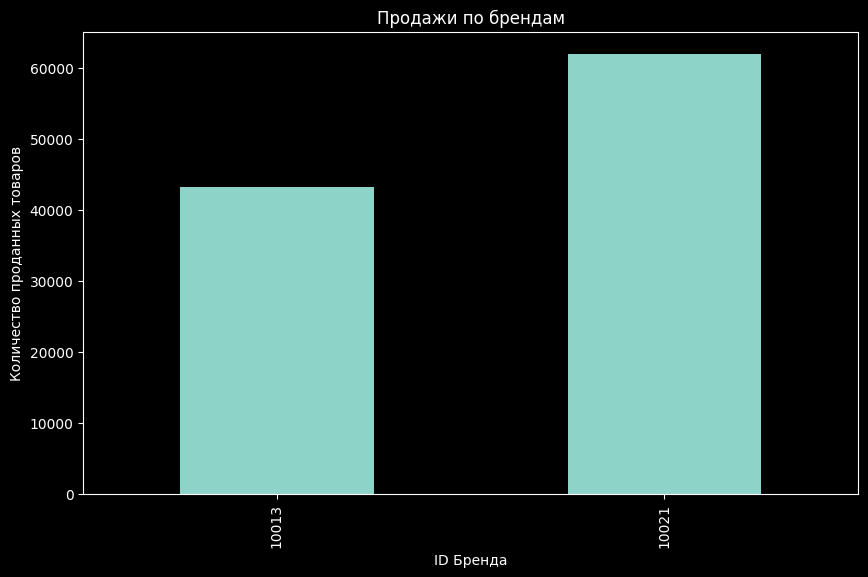

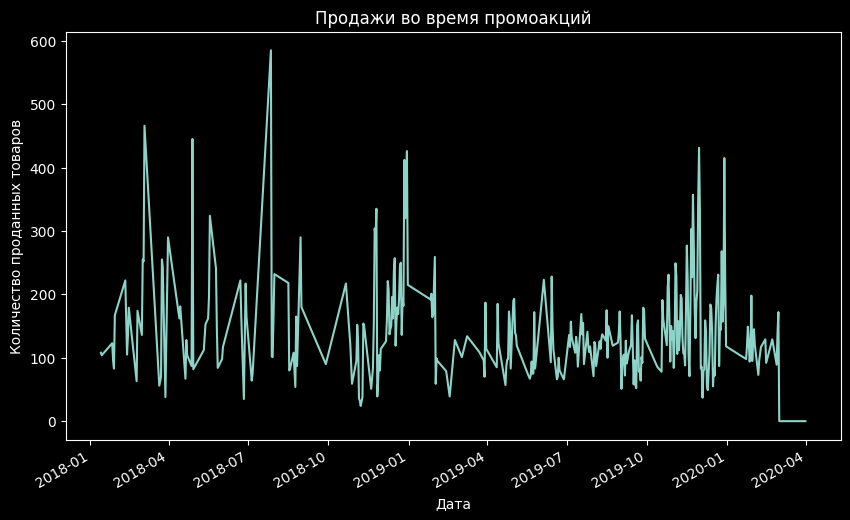

In [8]:
plt.figure(figsize=(10, 6))
sales_by_date.plot()
plt.title('Продажи по дням')
plt.xlabel('Дата')
plt.ylabel('Количество проданных товаров')
plt.show()


sales_by_brand.plot(kind='bar', figsize=(10, 6))
plt.title('Продажи по брендам')
plt.xlabel('ID Бренда')
plt.ylabel('Количество проданных товаров')
plt.show()


plt.figure(figsize=(10, 6))
promo_sales.plot()
plt.title('Продажи во время промоакций')
plt.xlabel('Дата')
plt.ylabel('Количество проданных товаров')
plt.show()

In [9]:
train[['item_price', 'item_cnt_day', 'discamount']].corr()

,item_price,item_cnt_day,discamount
item_price,1.000000,-0.029510,0.521733
item_cnt_day,-0.029510,1.000000,0.000603
discamount,0.521733,0.000603,1.000000


# Что мы видим из первичного анализа
 * Нет пропущенных значений.
 * Нет категориальных переменных.
 * Разное распределение значений у переменных (в зависимости от выбора модели, это может быть важно)

# По графикам
 Продажи по дням:
     График показывает высокую волатильность с ярко выраженными пиками в определенные периоды. 
     Это может указывать на сезонные колебания спроса или влияние акций/промоакций.
     Видны различные пики, особенно в начале и середине года, что может свидетельствовать о сезонных событиях или крупных распродажах.

 Продажи по акциям:
     График показывает, что во время промоакций наблюдаются резкие пики в продажах, что ожидаемо, так как скидки стимулируют спрос.
     Особенно стоит обратить внимание на периоды с максимальными всплесками — вероятно, это крупные акции,
     такие как сезонные распродажи или специальные предложения.


# Также:
     Минимальные значения в некоторых столбцах, например, 
     item_cnt_day = -4, могут указывать на аномалии или ошибки в данных (возможно, возвраты). 
     Эти значения стоит учесть и, возможно, обработать перед построением модели.

# Просмотр всех файлов в совокупности

In [10]:
file_path_stock = os.path.join('..', 'data', 'raw', 'stock.xlsx')
file_path_items = os.path.join('..', 'data', 'raw', 'items.csv')

stock = pd.read_excel(file_path_stock)
items = pd.read_csv(file_path_items, encoding='cp1251', sep=';')

In [11]:
stock.head()

,store,month,days with 0 balance,year,itemid
0,128,9,3,2018,15799504008
1,111,9,2,2018,15816752002
2,128,12,1,2018,35865312103
3,111,12,2,2018,16924544029
4,111,1,1,2018,15801296004


In [12]:
items.head()

,item_id,brand_id,item_category_id,item_category
0,20224176006,10013,444,Макияж
1,20221040001,10013,444,Макияж
2,20221376004,10013,444,Макияж
3,15793344028,10021,444,Макияж
4,35852544052,10013,444,Макияж


In [13]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17678 entries, 0 to 17677
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   store                17678 non-null  int64
 1   month                17678 non-null  int64
 2   days with 0 balance  17678 non-null  int64
 3   year                 17678 non-null  int64
 4   itemid               17678 non-null  int64
dtypes: int64(5)
memory usage: 690.7 KB


In [14]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_id           1367 non-null   object
 1   brand_id          1367 non-null   int64 
 2   item_category_id  1367 non-null   int64 
 3   item_category     1367 non-null   object
dtypes: int64(2), object(2)
memory usage: 42.8+ KB


In [15]:
print("Уникальные значения store в stock:", stock['store'].unique())
print("Уникальные значения shop_id в train:", train['shop_id'].unique())

Уникальные значения store в stock: [128 111 110]
Уникальные значения shop_id в train: [111 128 110]


In [16]:
common_items = set(stock['itemid']).intersection(set(train['item_id']))
print(f"Общие товары между stock и train: {len(common_items)}")

Общие товары между stock и train: 682


# Что мы видим из общего анализа датасетов

* Уникальные значения store и shop_id совпадают:

Мы обнаружили 682 общих товара между таблицами stock и train, что свидетельствует о том, что объединение по этим товарам будет возможным. 
Однако важно отметить, что в train может быть больше товаров, чем в stock, поэтому после объединения могут появиться пропуски.

Дальнейшая идея, это обьеденить их, что может улучшить показатели будущей модели

In [17]:
# Переименование столбцов в stock и train
stock.rename(columns={'store': 'shop_id', 'itemid': 'item_id'}, inplace=True)
train.rename(columns={'Month': 'month', 'Year': 'year'}, inplace=True)

In [18]:
# Объединение с основным датасетом по shop_id, item_id, month, year
train_merged = pd.merge(train, stock, on=['shop_id', 'item_id', 'month', 'year'], how='left')

In [19]:
train_merged['item_id'] = train_merged['item_id'].astype(str)
items['item_id'] = items['item_id'].astype(str)

In [20]:
# Объединение с items.csv по item_id
train_merged = pd.merge(train_merged, items, on='item_id', how='left')

In [21]:
train_merged.head(7)

,date,month,year,date_block_num,week,shop_id,item_id,brand_id_x,item_cnt_day,item_price,discamount,promo,size_disc,promo_time,spec_promo,days with 0 balance,brand_id_y,item_category_id,item_category
0,2018-01-01,1,2018,0,1,111,35852544067,10013,1,265,0,0,0,0,0,NaN,10013.0,444.0,Макияж
1,2018-01-01,1,2018,0,1,111,15793344028,10021,1,228,0,0,0,0,0,NaN,10021.0,444.0,Макияж
2,2018-01-01,1,2018,0,1,111,8221024002,10021,1,425,0,0,0,0,0,NaN,10021.0,333.0,Парфюмерия
3,2018-01-01,1,2018,0,1,111,20221376004,10013,1,139,0,0,0,0,0,NaN,10013.0,444.0,Макияж
4,2018-01-01,1,2018,0,1,111,20221040001,10013,1,135,0,0,0,0,0,NaN,10013.0,444.0,Макияж
5,2018-01-01,1,2018,0,1,111,20224176006,10013,1,399,0,0,0,0,0,NaN,10013.0,444.0,Макияж
6,2018-01-01,1,2018,0,1,111,35852544069,10013,1,859,0,0,0,0,0,NaN,10013.0,444.0,Макияж


In [22]:
# Появился один дублирующиеся столбец, удалим его
train_merged = train_merged.drop(columns=['brand_id_y'])

In [23]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110767 entries, 0 to 110766
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 110767 non-null  datetime64[ns]
 1   month                110767 non-null  int64         
 2   year                 110767 non-null  int64         
 3   date_block_num       110767 non-null  int64         
 4   week                 110767 non-null  int64         
 5   shop_id              110767 non-null  int64         
 6   item_id              110767 non-null  object        
 7   brand_id_x           110767 non-null  int64         
 8   item_cnt_day         110767 non-null  int64         
 9   item_price           110767 non-null  int64         
 10  discamount           110767 non-null  int64         
 11  promo                110767 non-null  int64         
 12  size_disc            110767 non-null  int64         
 13  promo_time    

In [24]:
train_merged.isna().sum() * 100 / len(train_merged)

date                    0.000000
month                   0.000000
year                    0.000000
date_block_num          0.000000
week                    0.000000
shop_id                 0.000000
item_id                 0.000000
brand_id_x              0.000000
item_cnt_day            0.000000
item_price              0.000000
discamount              0.000000
promo                   0.000000
size_disc               0.000000
promo_time              0.000000
spec_promo              0.000000
days with 0 balance    63.400652
item_category_id        0.550706
item_category           0.550706
dtype: float64

In [25]:
print('item_category_id unique values:', train_merged['item_category_id'].unique())
print('item_category unique values:', train_merged['item_category'].unique())

print('----------------------')

print('item_category_id -', train_merged['item_category_id'].dtype)
print('item_category -', train_merged['item_category'].dtype)

item_category_id unique values: [444. 333. 555. 666.  nan]
item_category unique values: ['Макияж' 'Парфюмерия' 'Уход' 'Уход за волосами' nan]
----------------------
item_category_id - float64
item_category - object


In [26]:
# Заполняем пропуски в item_category и item_category_id
train_merged['item_category_id'] = train_merged['item_category_id'].fillna(-1)  # Заполняем неизвестные ID как -1
train_merged['item_category'] = train_merged['item_category'].fillna('unknown')  # Пропуски как 'unknown'

# Преобразуем категориальные переменные в числовые с помощью LabelEncoder
label_encoder = LabelEncoder()
train_merged['item_category'] = label_encoder.fit_transform(train_merged['item_category'])

In [27]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110767 entries, 0 to 110766
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 110767 non-null  datetime64[ns]
 1   month                110767 non-null  int64         
 2   year                 110767 non-null  int64         
 3   date_block_num       110767 non-null  int64         
 4   week                 110767 non-null  int64         
 5   shop_id              110767 non-null  int64         
 6   item_id              110767 non-null  object        
 7   brand_id_x           110767 non-null  int64         
 8   item_cnt_day         110767 non-null  int64         
 9   item_price           110767 non-null  int64         
 10  discamount           110767 non-null  int64         
 11  promo                110767 non-null  int64         
 12  size_disc            110767 non-null  int64         
 13  promo_time    

# days with 0 balance

* У этой колонки самое большое количесво пропусков
* Не до конца понятно, от куда эти пропуски, и соответственно, как их заменять
* Хорошим решением кажется обучить две модельки и посмотреть на практике

In [28]:
# Выбор пал на lightGBM просто потому, что он достаточно быстрый и эффективен во временных рядах
# А сейчас нам именно это и надо

In [29]:
categorical_columns = train_merged.select_dtypes(exclude=np.number).columns.tolist()

In [30]:
# Создаём копии данных для двух моделей (с и без 'days with 0 balance')
train_with_col = train_merged.copy()
train_without_col = train_merged.drop(columns=['days with 0 balance'], axis=1)

In [31]:
# Преобразование категориальных переменных в числовые значения с помощью LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем все категориальные признаки в числовые
for col in ['shop_id', 'item_id', 'brand_id_x', 'item_category_id', 'item_category']:
    train_with_col[col] = label_encoder.fit_transform(train_with_col[col].astype(str))
    train_without_col[col] = label_encoder.fit_transform(train_without_col[col].astype(str))

# Преобразуем 'days with 0 balance' в числовой формат (float)
train_with_col['days with 0 balance'] = pd.to_numeric(train_with_col['days with 0 balance'], errors='coerce')

# Заполнение пропусков в 'days with 0 balance' нулями
train_with_col['days with 0 balance'].fillna(0, inplace=True)

# Преобразование даты в числовой формат
train_with_col['date'] = train_with_col['date'].astype(int)
train_without_col['date'] = train_without_col['date'].astype(int)

/tmp/ipykernel_111157/759044635.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_with_col['days with 0 balance'].fillna(0, inplace=True)


In [32]:
# Выделение целевой переменной и признаков
X_with_col = train_with_col.drop(columns=['item_cnt_day'])
y_with_col = train_with_col['item_cnt_day']

X_without_col = train_without_col.drop(columns=['item_cnt_day'])
y_without_col = train_without_col['item_cnt_day']

# Разделение данных на тренировочную и тестовую выборки
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X_with_col, y_with_col, test_size=0.2, shuffle=False)
X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(X_without_col, y_without_col, test_size=0.2, shuffle=False)

In [36]:
# Обучение модели с 'days with 0 balance'
model_with_col = lgb.LGBMRegressor(random_state=42)
model_with_col.fit(X_train_with, y_train_with)

# Предсказание и оценка
y_pred_with = model_with_col.predict(X_test_with)
rmse_with = root_mean_squared_error(y_test_with, y_pred_with)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 88613, number of used features: 17
[LightGBM] [Info] Start training from score 1.118944


In [37]:
# Обучение модели без 'days with 0 balance'
model_without_col = lgb.LGBMRegressor(random_state=42)
model_without_col.fit(X_train_without, y_train_without)

# Предсказание и оценка
y_pred_without = model_without_col.predict(X_test_without)
rmse_without = root_mean_squared_error(y_test_without, y_pred_without)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 88613, number of used features: 16
[LightGBM] [Info] Start training from score 1.118944


In [38]:
print(f"RMSE для модели с 'days with 0 balance': {rmse_with}")
print(f"RMSE для модели без 'days with 0 balance': {rmse_without}")

RMSE для модели с 'days with 0 balance': 0.7364003565687336
RMSE для модели без 'days with 0 balance': 0.7415474353188345


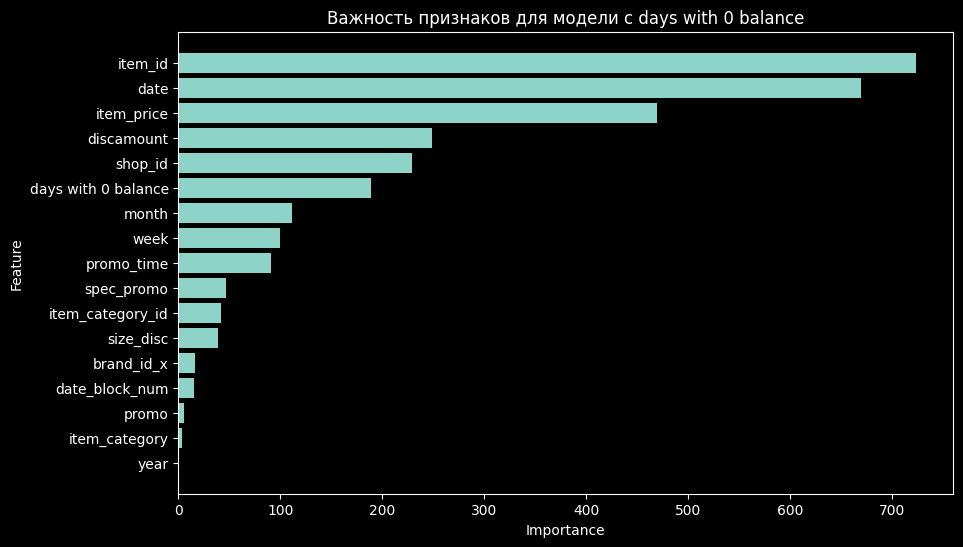

In [39]:
feature_importance = model_with_col.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X_train_with.columns,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.title('Важность признаков для модели с days with 0 balance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Мы видим, что 'days with 0 balance' давольно важна. Поэтому оставляем её
и в дальнейшем будет более внимательно подходить к её обработке

In [40]:
interim_dir = os.path.join('..', 'data', 'interim')
processed_data_path = os.path.join(interim_dir, 'cleared_dataset_csv')

train_merged.to_csv(processed_data_path, index=False)

In [41]:
train_merged

,date,month,year,date_block_num,week,shop_id,item_id,brand_id_x,item_cnt_day,item_price,discamount,promo,size_disc,promo_time,spec_promo,days with 0 balance,item_category_id,item_category
0,2018-01-01,1,2018,0,1,111,35852544067,10013,1,265,0,0,0,0,0,NaN,444.0,1
1,2018-01-01,1,2018,0,1,111,15793344028,10021,1,228,0,0,0,0,0,NaN,444.0,1
2,2018-01-01,1,2018,0,1,111,8221024002,10021,1,425,0,0,0,0,0,NaN,333.0,2
3,2018-01-01,1,2018,0,1,111,20221376004,10013,1,139,0,0,0,0,0,NaN,444.0,1
4,2018-01-01,1,2018,0,1,111,20221040001,10013,1,135,0,0,0,0,0,NaN,444.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110762,2020-03-31,3,2020,26,120,111,16923312074,10021,0,580,290,1,50,6,0,5.0,555.0,3
110763,2020-03-31,3,2020,26,120,111,16923312074,10021,0,580,290,1,50,6,0,5.0,555.0,3
110764,2020-03-31,3,2020,26,120,111,16923312064,10021,0,325,163,1,50,6,0,NaN,555.0,3
110765,2020-03-31,3,2020,26,120,111,16925552013,10021,0,210,105,1,50,6,0,NaN,555.0,3
